Vid Sustar <br>
student number 508706 <br>
vid.sustar@utu.fi  <br>
22.1.2020  <br>

# Exercise 1 | TKO_2096 Application of Data Analysis 2020

#### Nested cross-validation for K-nearest neighbors <br>
- Use Python 3 to program a nested cross-validation for the k-nearest neighbors (kNN) method so that the number of neighbours k is automatically selected from the range 1 to 10. In other words, the base learning algorithm is kNN but the actual learning algorithm, whose prediction performance will be evaluated with nested CV, is kNN with automatic CV-based model selection (see the lecture slides and the pseudo codes presented on them for more info on this interpretation).
- As a kNN implementation, you can use sklearn: http://scikit-learn.org/stable/modules/neighbors.html or you can also do your own kNN implementation (see the bonus exercise below). The CV implementation should be easily modifiable, since the forthcoming exercises involve different problem-dependent CV variations.
- Use the nested CV implementation on the iris data and report the resulting classification accuracy. Hint: you can use the nested CV example provided on sklearn documentation: https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html as a starting point and compare your nested CV implementation with that but do NOT use the ready made CV implementations of sklearn as the idea of the exercise is to learn to split the data on your own. The other exercises need more sophisticated data splitting which are not necessarily available in libraries.
- Return your solution for each exercise BOTH as a Jupyter Notebook file and as a PDF-file made from it.
- Exercise providing a bonus point: Program your OWN implementation of k-nearest neighbors (kNN)
- Return the report to the course page on **Monday 20. of January** at the latest.  

## Import libraries

In [1]:
#In this cell import all libraries you need.

import urllib.request
import shutil
import numpy as np      
import csv
import random
import math
import operator
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

path=os.getcwd()

## Results the nested cross-validation

## Bonus exercise
Write your own implementation of the kNN method


Vid Sustar, 508706, Applications of Data Analysis, Exercise 01, 22.1.2020

Data used is iris data from UCI machine learning depository

Observations: by initial 80/20 split training/test and 10 fold Cross Validation within training set it turns out the 1-15 k nearest neighbours give the lowest classification error

dataset url: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Train set # instances: 121
Test set # instances: 29
by k:  1  number of neighbours and  10  folds, crossvalidation average Classification Error is:   5.000000000000001
by k:  3  number of neighbours and  10  folds, crossvalidation average Classification Error is:   5.000000000000001
by k:  5  number of neighbours and  10  folds, crossvalidation average Classification Error is:   5.000000000000002
by k:  7  number of neighbours and  10  folds, crossvalidation average Classification Error is:   6.602564102564104
by k:  9  number of neighbours and  10  folds, crossvalidation average Classific

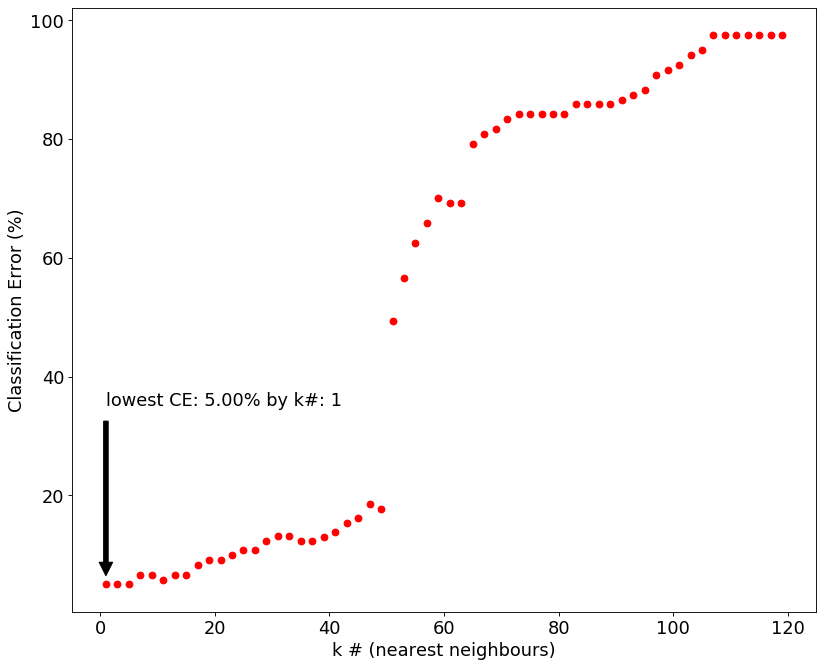

lowestavecerr:  5.000000000000001
best k:  1

 10  fold CrossValidation in a range of K-NN gives Lowest Classification Error of  3.4482758620689613 %  in final testing on  unused testSet  20.0 % of initial data by  k:  1  neighbours


In [2]:
#Write the kNN code here and run nested CV with it
#In this cell run your script for nested CV and print the result.

print("""\nVid Sustar, 508706, Applications of Data Analysis, Exercise 01, 22.1.2020

Data used is iris data from UCI machine learning depository

Observations: by initial 80/20 split training/test and 10 fold Cross Validation within training set it turns out the 1-15 k nearest neighbours give the lowest classification error
""")


#the code:


#######################################################################################################################################
#######################################################################################################################################
folds=10 #set the number of folds by fold cross validation
split = 0.80 #set the spliting of inital data x100, percent of training set, remainder is final testing set
#######################################################################################################################################
#######################################################################################################################################

#dataset from  UCI machine learning repository: http://archive.ics.uci.edu/ml/
file_name="iris.data"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# downloading of the file from `url` and saving it locally under `file_name`:
with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)
fulpath=(path+"\\"+file_name)

#randomly spliting the downloaded data into training and testing set 
def loadDataset(fulpath, split, trainingSet=[] , testSet=[]):
	with open(fulpath, 'rt') as csvfile:
	    lines = csv.reader(csvfile)
	    dataset = list(lines)
	    for x in range(len(dataset)-1):
	        for y in range(4):
	            dataset[x][y] = float(dataset[x][y])
	        if random.random() < split:
	            trainingSet.append(dataset[x])
	        else:
	            testSet.append(dataset[x])
                
#measuring the distances between data instances, to find the nearest neighbours
#Euclidean can be used because the variables have the same units, not many instances have missing values
#otherwise data would need to be first normalised
def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):#length is the number of columns until the classifier (last column)
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)

#finding the k sized subset of nearest other instances to each instance - k number of nearest neighbours
def getNeighbors(trainingSet, testInstance, k):###########length,k
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(min(k, len(trainingSet))):
		neighbors.append(distances[x][0])
	return neighbors

#finding the most numerous classification of the found k nearest instances / neighbours voting
def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0] #since it was sorted only the the most common - first one - -  is returned
#testing the Classification error (false classification/all classifications *100 as percent) of class prediction on the testSet
def getClassError(testSet, predictions): 
	correct = 0
	for x in range(min(len(predictions),len(testSet))):
		if testSet[x][-1] == predictions[x]:
			correct += 1
	classError=(1-(correct/float(len(testSet)))) * 100.0
	return classError

def CrossValidation(trainset,folds):
	myList = list(range(1,len(trainset)))
	ks = filter(lambda x: x % 2 != 0, myList) #creating odd number of list for neighbours, needed for easier voting of most common classifier
	myList = myList[0::2]#print("len(ks): ",len(ks))
	lowestavecerr=100#lowest CV average classification error
	bestk=0#K number of neighbours with lowest classification error
	avecerrtlist=[]
	klist=[]
	for kk in myList: #number of neighbourse
		avecerr=0 #average classification error (from 10 fold crossvalidation)
		ClassErrorlist=[]
		for i in range(folds): #fold crossvalidation
			predictions=[]
			trainingSet=[]
			testSet=[]
			testStart = int(i*(len(trainset)/folds)) #dividing the initial training set into subtesting and subtrainning in ratio 1/# folds
			testEnd = int((i+1)*(len(trainset)/folds))
			testSet=trainset[testStart:testEnd]
			trainOne=trainset[:testStart] #as the testing subset is chosen by fold steps along the original training set, the training subset is combined from preceding and succeding instances
			trainTwo=trainset[testEnd:]
			trainingSet=trainOne+trainTwo
			for x in range(len(testSet)):
				neighbors = getNeighbors(trainingSet, testSet[x], kk)
				result = getResponse(neighbors)
				predictions.append(result)
			ClassError = getClassError(testSet, predictions)
			ClassErrorlist.append(ClassError)
		avecerrt=sum(ClassErrorlist)/float(len(ClassErrorlist))
		print("by k: ",kk," number of neighbours and ",folds," folds, crossvalidation average Classification Error is:  ",avecerrt)
		avecerrtlist.append(avecerrt)   
		klist.append(kk) 
		if(avecerrt<lowestavecerr):      
			lowestavecerr=avecerrt       
			bestk=kk
	figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k') #ploting the outcome
	plt.rcParams.update({'font.size': 16})
	plt.plot(klist, avecerrtlist, 'ro')
	#plt.axis(myList[0::2])
	plt.ylabel('Classification Error (%)')
	plt.xlabel('k # (nearest neighbours)')
	lwstring="lowest CE: {0:.2f}".format(lowestavecerr)+"% by k#: "+str(bestk)   
	plt.annotate(lwstring, xy=(bestk,lowestavecerr), xytext=(bestk,lowestavecerr+30),arrowprops=dict(facecolor='black', shrink=0.05),)
	plt.show()
	print('lowestavecerr: ',lowestavecerr)
	print('best k: ',bestk)       
	return bestk

def main():
	# prepare data
	trainingSet=[]
	testSet=[]
	loadDataset(file_name, split, trainingSet, testSet)
	print("dataset url:", url)
	print( 'Train set # instances: ' + repr(len(trainingSet)))
	print( 'Test set # instances: ' + repr(len(testSet)))
	# generate predictions
	predictions=[]
	k2 = CrossValidation(trainingSet,folds)
	for x in range(len(testSet)):
		neighbors = getNeighbors(trainingSet, testSet[x], k2)
		result = getResponse(neighbors)
		predictions.append(result)
		#print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
	ClassError = getClassError(testSet, predictions)
	print("\n",folds," fold CrossValidation in a range of K-NN gives Lowest Classification Error of ",repr(ClassError) ,"%  in final testing on  unused testSet ",(100-split*100),"% of initial data by  k: ",k2," neighbours")    
main()

# Sources:
# https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
# https://obiiirehman.wordpress.com/2017/05/12/knn-classifier-cross-validation/